In [ ]:
Soal 1. Pemahaman k-means clustering
Jelaskan bagaimana cara kerja k-means clustering!
jawab:
1. Inisiasi jumlah kluster secara random, misalkan kita pilih k=2. K adalah sebuah parameter yang mewakilkan angka dari cluster yang data points nya akan dilakukan pengelompokan.
2. Tentukan posisi centroid secara random.
3. Hitung jarak antara data point ke centroid. Assign setiap data ke centroid terdekat (hal ini akan membentuk  k clusters).Perhitungan jarak antara titik data ke centroid menggunakan formula euclidean distance
4. Kemudian hitung ulang centroid berdasarkan label-label data sebelumnya. Disini kita buat kembali centroid baru dan menghitung kembali jarak antar data poin ke centroid.
5. Kemudian di assign kembali data poin ke centroid terdekat yang terbaru, dan kita cek apakah ada perubahan dalam cluster atau tidak, jika ada maka kita perlu kembali ke poin 4 mencari posisi centroid yang tidak mengubah cluster. Hal ini kita lakukan perulangan sampai posisi centroid tidak berubah lagi. 

 

In [14]:
import pandas as pd 
df=pd.read_csv('pelanggan_supermarket.csv')
df.head()

,ID_pelanggan,Jenis Kelamin,Umur,Pendapatan pertahun (juta),Skor Belanja (1-100)
0,1,Laki-laki,19.0,15,39.0
1,2,Laki-laki,21.0,15,81.0
2,3,Perempuan,20.0,16,6.0
3,4,Perempuan,23.0,16,77.0
4,5,Perempuan,31.0,17,40.0


In [ ]:
Soal 2. Clustering data menggunakan k-means clustering
Dalam soal ini, kalian diminta untuk melakukan clustering antara data Umur dan Skor Belanja(1-100). Namun, clustering tidak bisa dilakukan karena data memiliki outlier dan missing value. Maka, lakukanlah tahapan-tahapan berikut:

Handling missing value dengan menggunakan method ='ffill'

Handling outlier menggunakan metode Interquartile range

Lakukan rescaling data menggunakan StandardScaler

Lakukan clustering menggunakan kmeans clustering dengan k =2, dan visualisasikan..

Gunakan Elbow method untuk menemukan jumlah k kluster yang tepat

Gunakan k=3 (rekomendasi methode Elbow) lalu visualisasikan

Hitung silhoutte Coefficient dari ke dua hasil prediksi klustering tersebut

In [29]:
#handling mising value 
df_handling=df.fillna(method='ffill')
df_handling.isnull().sum()


ID_pelanggan                  0
Jenis Kelamin                 0
Umur                          0
Pendapatan pertahun (juta)    0
Skor Belanja (1-100)          0
dtype: int64

In [31]:
def finding_outlier(df_handling):
    q1=df_handling.quantile(0.25)
    q3=df_handling.quantile(0.75)
    iqr=q3-q1
    upper_bound=q3+(1.5*iqr)
    lower_bound=q1-(1.5*iqr)
    df_final=df_handling[(df_handling < upper_bound) & (df_handling > lower_bound)]
    return df_final
finding_outlier(df_handling[['Umur','Skor Belanja (1-100)']])

,Umur,Skor Belanja (1-100)
0,19.0,39.0
1,21.0,81.0
2,20.0,6.0
3,23.0,77.0
4,31.0,40.0
...,...,...
245,59.0,14.0
246,35.0,90.0
247,37.0,32.0
248,32.0,86.0


In [32]:
def remove_outlier(df_handling):
    q1=df_handling.quantile(0.25)
    q3=df_handling.quantile(0.75)
    iqr=q3-q1
    upper_bound=q3+(1.5*iqr)
    lower_bound=q1-(1.5*iqr)
    df_final=df_handling[(df_handling < upper_bound) & (df_handling > lower_bound)]
    return df_final

df2=remove_outlier(df_handling[['Umur','Skor Belanja (1-100)']])
df2.dropna(axis=0, inplace=True)

In [33]:
df2

,Umur,Skor Belanja (1-100)
0,19.0,39.0
1,21.0,81.0
2,20.0,6.0
3,23.0,77.0
4,31.0,40.0
...,...,...
244,27.0,69.0
245,59.0,14.0
246,35.0,90.0
247,37.0,32.0


In [37]:
#feature scaling 
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
df_std =sc.fit_transform(df2.astype(float))

In [38]:
from sklearn.cluster import KMeans 
kmeans1=KMeans(n_clusters=2,random_state=42).fit(df_std)
labels1=kmeans1.labels_
labels1


array([0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0])

In [39]:
# membuat sebuah data baru 
new_df=pd.DataFrame(data=df_std, columns=['Umur','Skor Belanja (1-100)'])
new_df['label1_kmeans']=labels1
new_df

,Umur,Skor Belanja (1-100),label1_kmeans
0,-1.455005,-0.396407,0
1,-1.304215,1.119369,0
2,-1.379610,-1.587373,1
3,-1.153425,0.975009,0
4,-0.550263,-0.360317,0
...,...,...,...
243,-0.851844,0.686290,0
244,1.560802,-1.298654,1
245,-0.248682,1.444178,0
246,-0.097892,-0.649036,1


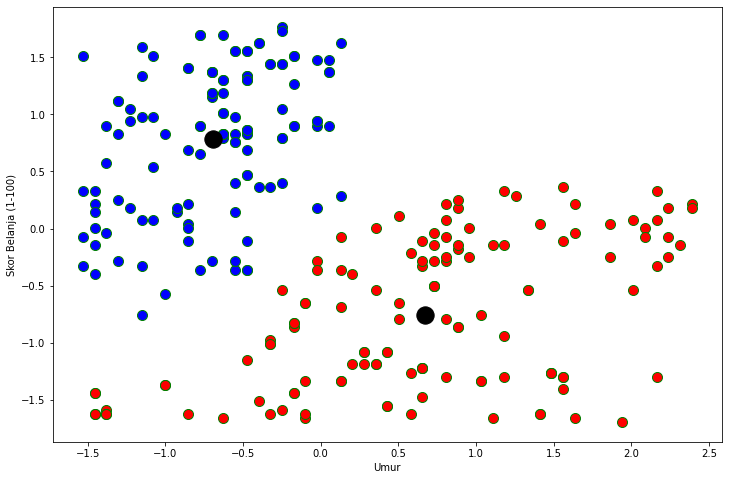

In [49]:
import matplotlib.pyplot as plt 
plt.figure(figsize=(12,8))
plt.scatter(new_df['Umur'][new_df.label1_kmeans==0],new_df['Skor Belanja (1-100)'][new_df.label1_kmeans==0],c='blue',s=100,edgecolors='green')
plt.scatter(new_df['Umur'][new_df.label1_kmeans==1],new_df['Skor Belanja (1-100)'][new_df.label1_kmeans==1],c='red',s=100,edgecolors='green')
plt.scatter(kmeans1.cluster_centers_[:,0],kmeans1.cluster_centers_[:,1],s=300, c='black')
plt.xlabel('Umur')
plt.ylabel('Skor Belanja (1-100)')
plt.show()

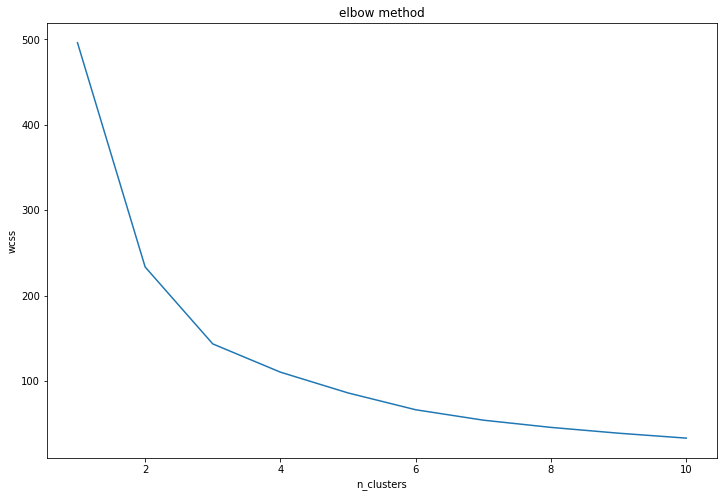

In [41]:
import matplotlib.pyplot as plt
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i, init='k-means++', random_state=42).fit(df_std)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,8))
plt.plot(range(1,11),wcss)
plt.title('elbow method')
plt.xlabel('n_clusters')
plt.ylabel('wcss')
plt.show()

In [43]:
kmeans2=KMeans(n_clusters=3,init='k-means++',random_state=42).fit(df_std)
labels2=kmeans2.labels_
labels2

array([0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 1, 2, 1, 2, 0, 2, 2, 1, 2, 0, 2, 0,
       2, 1, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2, 1, 2, 1, 2, 1,
       2, 1, 0, 0, 0, 1, 2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 2, 1,
       1, 2, 0, 1, 1, 1, 1, 1, 2, 1, 0, 2, 1, 1, 2, 1, 1, 2, 1, 1, 2, 2,
       1, 1, 0, 1, 0, 0, 2, 1, 2, 1, 2, 0, 1, 1, 2, 1, 0, 1, 1, 1, 1, 1,
       2, 0, 0, 2, 2, 1, 1, 1, 1, 2, 0, 2, 2, 0, 2, 0, 2, 1, 2, 1, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 1,
       2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 1,
       0, 1, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 1, 2, 1, 2, 0,
       2, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2,
       1, 2, 1, 2, 0, 2])

In [46]:
new_df2=pd.DataFrame(data=df_std, columns=['Umur','Skor Belanja (1-100)'])
new_df2['label2_kmeans']=labels2
new_df2

,Umur,Skor Belanja (1-100),label2_kmeans
0,-1.455005,-0.396407,0
1,-1.304215,1.119369,2
2,-1.379610,-1.587373,0
3,-1.153425,0.975009,2
4,-0.550263,-0.360317,0
...,...,...,...
243,-0.851844,0.686290,2
244,1.560802,-1.298654,1
245,-0.248682,1.444178,2
246,-0.097892,-0.649036,0


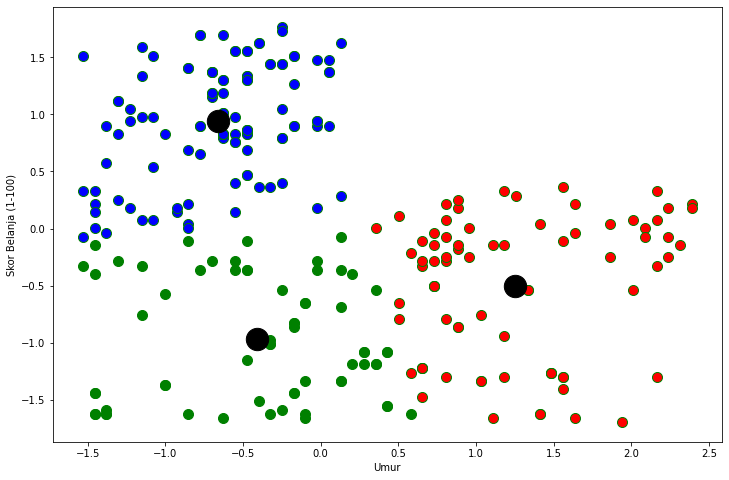

In [53]:
plt.figure(figsize=(12,8))
plt.scatter(new_df2['Umur'][new_df2.label2_kmeans==0],new_df2['Skor Belanja (1-100)'][new_df2.label2_kmeans==0],c='green',s=100,edgecolors='green')
plt.scatter(new_df2['Umur'][new_df2.label2_kmeans==1],new_df2['Skor Belanja (1-100)'][new_df2.label2_kmeans==1],c='red',s=100,edgecolors='green')
plt.scatter(new_df2['Umur'][new_df2.label2_kmeans==2],new_df2['Skor Belanja (1-100)'][new_df2.label2_kmeans==2],c='blue',s=100,edgecolors='green')
plt.scatter(kmeans2.cluster_centers_[:,0],kmeans2.cluster_centers_[:,1],s=500, c='black')
plt.xlabel('Umur')
plt.ylabel('Skor Belanja (1-100)')
plt.show()

In [48]:
from sklearn.metrics import  silhouette_score 
print(silhouette_score(df_std,labels=labels1))
print(silhouette_score(df_std,labels=labels2))

0.48555152598842644
0.4658669848365053


In [ ]:
Soal 3. Analisa Data Hasil Clustering
Dari hasil klustering diatas, buatlah sebuah analisa segmentasi pelanggan untuk kemajuan supermarket:

-Pada grafik hubungan umur dengan Skor belanja di atas dibagi menjadi 3 klauster yaitu klauster pertama ditandai dengan warna hijau,
klauster kedua di tandai dengan warna biru dan klauster ke tiga ditandai dengan warna merah.

-pada umur rentang nilai dari -1.5 sampai dengan 0.5  di kategorikan umur yang relatif masih muda didapatkan 2 klauster yaitu klauster pertama dan klauster kedua, dimana pada klauster pertama rentang skor belanjanya lebih rendah dari skor belanja klauster kedua, dengan rentang nilai dari -1.5 sampai dengan 0.0 sedangkan pada klauster kedua dengan nilai skor belanja lebih besar dari rentang nilai 0.0 sampai 2.5 sedangkan pada umur dengan rentang nilai dari 0.5 sampai dengan 2.5 di kategorika umur yang relatif lebih tua dengan rentang nilai skor dari -1.5 sampai dengan skor 0.5 

- Dari penjelasan sebelumnya juga untuk pihak dari supermarket seharusnya kedepannya lebih menyiapkan lebih banyak lagi kebutuhan untuk pelanggan yang umurnya lebih muda.

- Untuk meningkatkan pelanggan yang umurnya lebih tua sebaiknya pihak supermarket memperbanyak kebutuhan barang dan memberikan diskon untuk yang umur lebih tua supaya peningkatan belanja dari umur yang lebih tua tinggi lagi 



